<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-и-исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Предобработка-и-исследовательский-анализ-данных-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка и исследовательский анализ данных (EDA)</a></span><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Средние-значения-и-стандартные-отклонения" data-toc-modified-id="Средние-значения-и-стандартные-отклонения-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Средние значения и стандартные отклонения</a></span></li><li><span><a href="#Столбчатые-гистограммы-и-распределения-признаков-для-тех,-кто-ушёл/остался" data-toc-modified-id="Столбчатые-гистограммы-и-распределения-признаков-для-тех,-кто-ушёл/остался-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Столбчатые гистограммы и распределения признаков для тех, кто ушёл/остался</a></span></li><li><span><a href="#Матрица-корреляций" data-toc-modified-id="Матрица-корреляций-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Матрица корреляций</a></span></li></ul></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Модель-прогнозирования-оттока-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель прогнозирования оттока клиентов</a></span></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Кластеризация клиентов</a></span></li><li><span><a href="#Выводы-и-базовые-рекомендации-по-работе-с-клиентами" data-toc-modified-id="Выводы-и-базовые-рекомендации-по-работе-с-клиентами-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы и базовые рекомендации по работе с клиентами</a></span></li></ul></div>

# Анализ оттока клиентов в сети фитнес-центров «Культурист-датасаентист»

## Описание данных

«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:

Данные клиента за предыдущий до проверки факта оттока месяц:
* `gender` - пол;
* `near_location` - проживание или работа в районе, где находится фитнес-центр;
* `partner` - сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент - в таком случае фитнес-центр хранит информацию о работодателе клиента);
* `promo_friends` - факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* `phone` - наличие контактного телефона;
* `age` - возраст;
* `lifetime` - время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
* `contract_period` - длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* `month_to_end_contract` - срок до окончания текущего действующего абонемента (в месяцах);
* `group_visits` - факт посещения групповых занятий;
* `avg_class_frequency_total` - средняя частота посещений в неделю за все время с начала действия абонемента;
* `avg_class_frequency_current_month` - средняя частота посещений в неделю за предыдущий месяц;
* `avg_additional_charges_total` - суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* `churn` - факт оттока в текущем месяце.

## Обзор данных

Подгружаем необходимые библиотеки для работы:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt


pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = 50
pd.set_option('max_colwidth', None)

In [2]:
# загружаем данные

gum_data = pd.read_csv('/datasets/gym_churn.csv')

Зададим функции для первичного просмотра данных.

In [3]:
# функция для первичного просмотра датасета

def data_look(data):
    # приводим названия всех колонок к змеиному регистру
    data.columns = [x.lower().replace(' ', '_') for x in data.columns]
    print()
    print('\033[1m === Информация по датасету === \033[0m')
    print()
    data.info() # выводим информацию по датасету
    print()
    print('\033[1m === Первые 5 строк данных === \033[0m')
    display(data.head()) # выводим первые 5 строк
    print()
    print('\033[1m === Случайные 5 строк данных === \033[0m')
    display(data.sample(5, random_state=10)) # выводим последние 5 строк  
    print()
    print('\033[1m === Пропуски и уникальные значения по столбцам === \033[0m')
    # выводим данные о пропусках и уникальных значениях по каждому столбцу
    display(pd.concat([data.isna().sum().rename('nan_count'), # количество пропусков
                       data.isna().mean().rename('nan_percent'), # % пропусков
                       data.nunique().rename('unique_values')], # количество уникальных значений
                      axis=1).style.format({'nan_percent' : '{:.2%}'})) 
    print()
    print('\033[1m === Явные дубликаты === \033[0m')
    print()
    print('Количество явных дубликатов:', data.duplicated().sum())

Посмотрим на результаты по данным `gum_data`:

In [4]:
data_look(gum_data)


 === Информация по датасету === 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_t

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0



 === Случайные 5 строк данных === 


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
2177,1,1,1,1,1,12,0,25,9.05,9.00,3,1.06,1.00,0
2382,0,1,1,0,1,1,0,21,228.46,1.00,0,1.26,0.31,1
1715,0,1,0,0,1,6,1,28,145.59,6.00,3,3.54,3.53,0
2303,1,0,0,0,1,1,0,30,257.43,1.00,1,2.15,1.51,1
822,0,1,1,1,1,1,1,29,460.90,1.00,10,3.16,3.15,0



 === Пропуски и уникальные значения по столбцам === 


,nan_count,nan_percent,unique_values
gender,0,0.00%,2
near_location,0,0.00%,2
partner,0,0.00%,2
promo_friends,0,0.00%,2
phone,0,0.00%,2
contract_period,0,0.00%,3
group_visits,0,0.00%,2
age,0,0.00%,23
avg_additional_charges_total,0,0.00%,4000
month_to_end_contract,0,0.00%,12



 === Явные дубликаты === 

Количество явных дубликатов: 0


В таблице `gum_data` 14 столбцов.

Описание данных:

* `gender` - пол;
* `near_location` - проживание или работа в районе, где находится фитнес-центр;
* `partner` - сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент - в таком случае фитнес-центр хранит информацию о работодателе клиента);
* `promo_friends` - факт первоначальной записи в рамках акции "приведи друга" (использовал промо-код от знакомого при оплате первого абонемента);
* `phone` - наличие контактного телефона;
* `contract_period` - длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* `group_visits` - факт посещения групповых занятий;
* `age` - возраст;
* `avg_additional_charges_total` - суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон;
* `month_to_end_contract` - срок до окончания текущего действующего абонемента (в месяцах);
* `lifetime` - время с момента первого обращения в фитнес-центр (в месяцах);
* `avg_class_frequency_total` - средняя частота посещений в неделю за все время с начала действия абонемента;
* `avg_class_frequency_current_month` - средняя частота посещений в неделю за предыдущий месяц;
* `churn` - факт оттока в текущем месяце.

Всего в таблице 4000 строк, пропущенных значений нет.


**Вывод:**

* Пропуски не обнаружены.
* Проверить на аномалии и дубликаты.
* Перевести в целочисленный тип данных столбец `month_to_end_contract`.

## Предобработка и исследовательский анализ данных (EDA)

### Предобработка данных

Для более удобной дальнейшей работы посмотрим на данные в столбце `month_to_end_contract` и возможно заменим на `int`.

In [5]:
gum_data['month_to_end_contract'].value_counts()

1.00     2207
6.00      645
12.00     524
11.00     181
5.00      130
10.00      82
9.00       73
4.00       58
8.00       38
7.00       25
3.00       23
2.00       14
Name: month_to_end_contract, dtype: int64

Все значения в столбце `month_to_end_contract` целочисленные, поэтому поменяем на тип `int`.

In [6]:
gum_data['month_to_end_contract'] = gum_data['month_to_end_contract'].astype('int')

In [7]:
gum_data.info()
gum_data.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   int64  
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
2797,0,0,0,0,1,1,1,31,116.59,1,2,1.29,1.23,0
1425,1,1,0,0,1,1,0,33,34.96,1,4,1.89,1.79,0
1512,1,1,1,1,1,6,0,28,146.29,6,1,1.06,1.08,0
3278,1,0,0,0,1,1,0,25,71.90,1,0,1.17,1.06,1
2144,1,1,1,0,1,1,0,28,351.61,1,5,0.67,0.78,0
1422,0,1,1,1,1,12,0,33,114.16,12,3,1.99,1.95,0
808,0,1,0,0,1,1,0,35,224.02,1,3,4.21,4.43,0
1142,1,1,0,0,1,1,1,24,212.09,1,0,2.10,1.48,1
3724,0,1,1,0,1,1,0,36,336.75,1,6,2.82,2.97,0
1020,1,0,1,1,1,1,0,28,196.66,1,4,2.59,2.44,0


**Вывод:**

* Изменили тип данных в столбце `month_to_end_contract` на `int`.

### Средние значения и стандартные отклонения

Посмотрим на разброс данных, средние значения и стандартные отклонения. Для этого используем метод `describe`.

In [8]:
gum_data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.00,0.51,0.50,0.00,0.00,1.00,1.00,1.00
near_location,4000.00,0.85,0.36,0.00,1.00,1.00,1.00,1.00
partner,4000.00,0.49,0.50,0.00,0.00,0.00,1.00,1.00
promo_friends,4000.00,0.31,0.46,0.00,0.00,0.00,1.00,1.00
phone,4000.00,0.90,0.30,0.00,1.00,1.00,1.00,1.00
contract_period,4000.00,4.68,4.55,1.00,1.00,1.00,6.00,12.00
group_visits,4000.00,0.41,0.49,0.00,0.00,0.00,1.00,1.00
age,4000.00,29.18,3.26,18.00,27.00,29.00,31.00,41.00
avg_additional_charges_total,4000.00,146.94,96.36,0.15,68.87,136.22,210.95,552.59
month_to_end_contract,4000.00,4.32,4.19,1.00,1.00,1.00,6.00,12.00


Данные равномерны, стандартные отклонения не очень далеко от средних (исключение составляет: `age` (возраст) и `avg_additional_charges_total` (суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон), но это вполне объяснимо, т.к. возраст клиента и его страты на другие услуги фитнес-клуба могут быть различными). Выбросы так же не наблюдаются.

* Распределение по по полу практическии равно.
* Большинство клиентов живет (работает) рядом с фитнес-клубом.
* Практически половина клиентов является сотрудниками партнерских организаций.
* Около 31% клиентов пришли по акции "Приведи друга"ю
* Известны мобильные номера 91% клиентов.
* Средняя длительность аббонементов клиентов - 4,7 месяца.
* 41% клиентов посещают групповые занятия.
* Средний возраст клиентов - 29 лет.
* Средние дополнительные расходы на клиента - 147.
* Средний срок до окончания договора - 4,3 месяца.
* Среднее время с момента первого обращения в фитнес-клуб - 3,7 месяца.
* Средняя частота посещений за все время - 1,88 раз в неделю.
* Средняя частота посещений за последний месяц - 1,77 раз в неделю.
* 27% клиентов ушли за текущий месяц.

Посмотрим на средние значения признаков в двух группах - тех, кто ушел в отток и тех, кто остался.

In [9]:
gum_data.groupby('churn').mean().T

churn,0,1
gender,0.51,0.51
near_location,0.87,0.77
partner,0.53,0.36
promo_friends,0.35,0.18
phone,0.90,0.90
contract_period,5.75,1.73
group_visits,0.46,0.27
age,29.98,26.99
avg_additional_charges_total,158.45,115.08
month_to_end_contract,5.28,1.66


**Вывод**

* Распределение по полу не отличается, это говорит о том, что этот признак не влияет на отток/приток клиентов.
* Ближе живущие клиенты чуть реже попадают в отток. Можно сказать, что этот признак оказывает слабое влияние.
* Среди партнеров компаний отток клиентов меньше.
* Клиенты пришедшие по акции "Приведи друга" почти в два раза реже уходят. Этот показатель так же оказывает положительное влияние на клиентов.
* Наличее мобильного номера клиента не оказывает никакого вляние на их отток. Показатель не оказывает никакого влияния.
* Средняя длительность абонемента больше у оставшихся клиентов, это вполне логично, если клиент купил обонемент на год, то он будет ходить, чтобы не потерять деньги потраченные на приобретение абонемента. У большей части клиентов которые ушли в отток средний срок абонемента около 2-х месяцев. Влияние признака на клиентов высокое.
* Оставшиеся пользователи чаще ходят на групповые занятия. Этот признак так же оказывает сильное влияение на клиентов. Вполне возможно, что на групповых занятиях многие клиенты заводят новые знакомства, а это способствует посещению фитнес-клуба в целом.
* Возраст не оказывает сильное влияние на отток клиентов. Разница в среднем возрасте незначительная.
* Различие в выручке незначительное. Но клиенты которые остались тратят немного больше на дополнительные услуги в фитнес-клубе.
* Оставшееся время до конца абонемента намного больше у оставшихся клиентов, что вполне логично.
* Среди клиентов которые ходят уже продолжительное время отток значительно меньше, возможно все дело в привычке.
* Клиенты которые остались чаще посещают фитнес-клуб в неделю. Посещение в предыдущем месяце распределено приблизительно так же. Возможно дело в привычке.

Средний возраст клиентов в двух наших группах отличается незначительно. Посмотрим имеет ли возраст статистическую разницу в двух наших группах.

Гипотезы:
* Н0: Средний возраст клиентов оставшихся, равен среднему возрасту клиентов попавших в отток.
* Н1: Средний возраст оставшихся клиентов выше, чем у клиентов попавших в отток.

In [10]:
churn_no_data = gum_data.query('churn == 0')['age'] # отфильтруем данные по оставшимся клиентам
np.var(churn_no_data) # расчитаем дисперсию

9.056611113047065

In [11]:
churn_no_data.count() # посмотрим на количество записей оставшихся клиентов

2939

In [12]:
churn_data = gum_data.query('churn == 1')['age'] # отфильтруем данные по ушедшим клиентам (отток)
np.var(churn_data) # расчитаем дисперсию

8.374067819646253

In [13]:
churn_data.count() # посмотрим на количество записей оставшихся клиентов

1061

Мы имеем небольшую разницу в дисперсиях, но количество данных польльзователей попавших в отток намного меньше оставшихся клиентов, поэтому применим дополнительный параметр `equal_var = False`.

In [14]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(churn_no_data, churn_data, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.4384150241611314e-149
Отвергаем нулевую гипотезу


После проведения теста, мы еще раз подтвердили, что более взрослые клиенты не попадают в отток, а значит необходимо соредоточится на данной группе.

Далее посмотрим на графическое распределение.

### Столбчатые гистограммы и распределения признаков для тех, кто ушёл/остался

In [15]:
# список количественных переменных

histplot_columns = ['contract_period', 'age', 'avg_additional_charges_total',
                    'month_to_end_contract', 'lifetime', 'avg_class_frequency_total',
                    'avg_class_frequency_current_month']

# список категориальных переменных

countplot_columns = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']

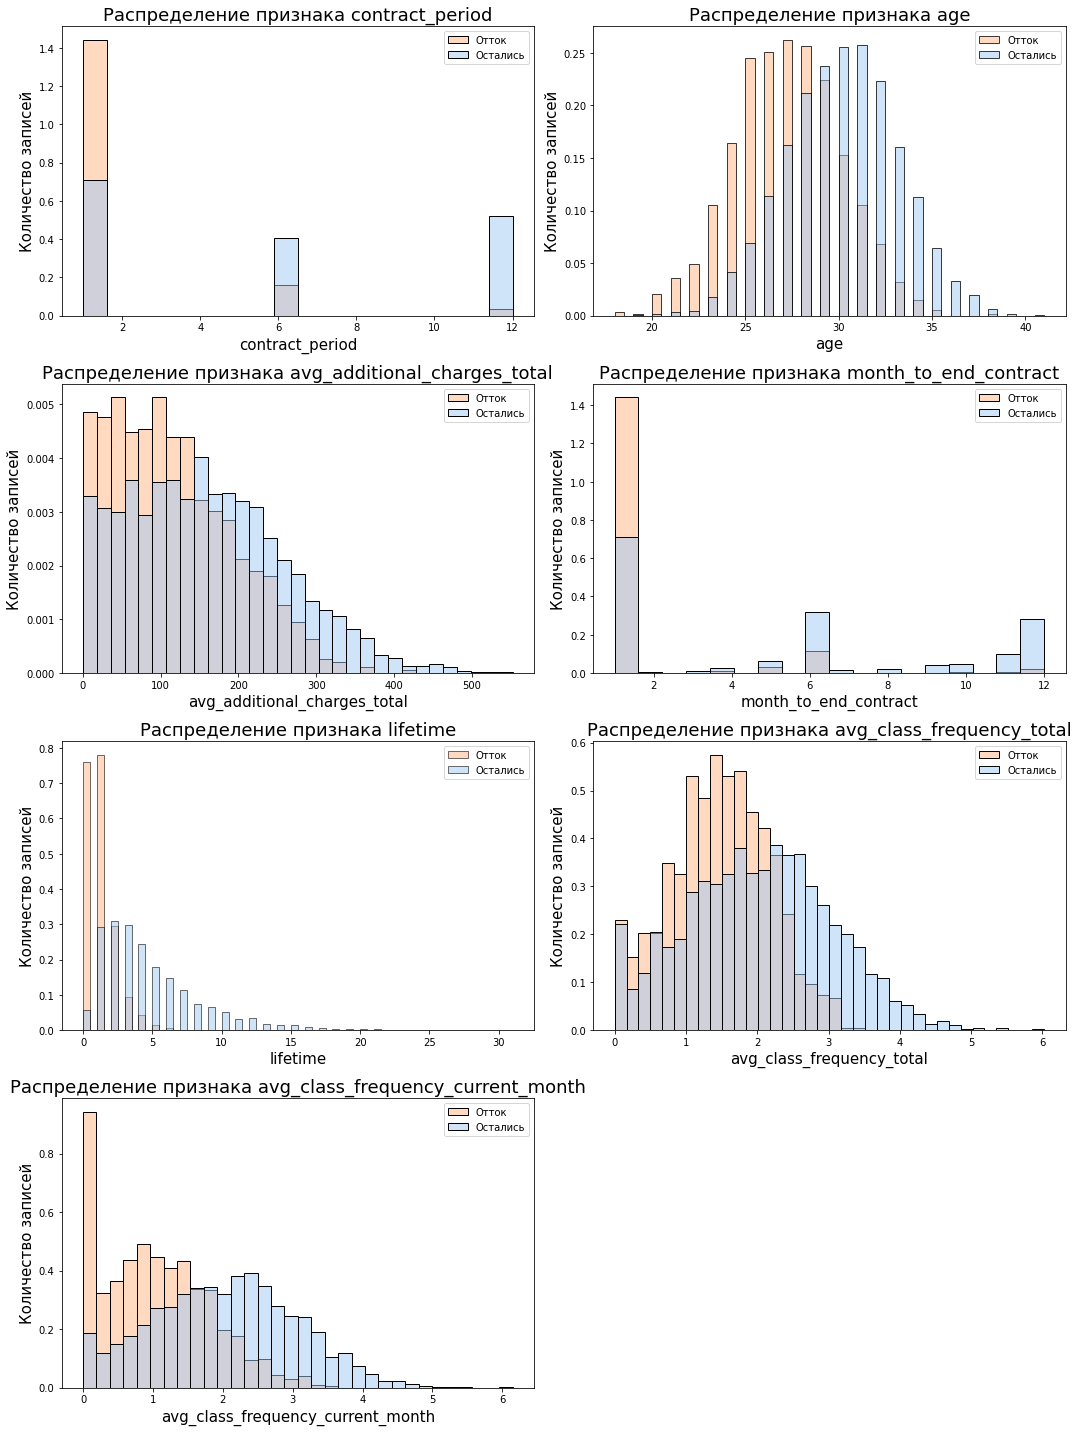

In [16]:
# задаем цикл для построения гистограмм по количественным переменным

fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes[3,1].set_axis_off()

axes = axes.ravel()

for column, ax in zip(histplot_columns, axes):
    sns.histplot(x=gum_data[column], ax=ax, data=gum_data, hue='churn', stat='density', common_norm=False,
                 palette='pastel')
    ax.set_title(f'Распределение признака {column}', fontsize = 18)
    ax.set_xlabel(column, fontsize = 15)
    ax.set_ylabel('Количество записей', fontsize = 15)
    ax.legend(['Отток', 'Остались'])

fig.tight_layout()
plt.show()

Гистограммы показывают, что чаще уходят молодые люди (от 27 до 29 лет), время с момента первого обращения которых в фитнес-центр составляет 1-2 месяца, с абонементом на 1 месяц. Суммарная выручка от других услуг фитнес-центра на долю ушедших относительно доли постоянных клиетов невелика.

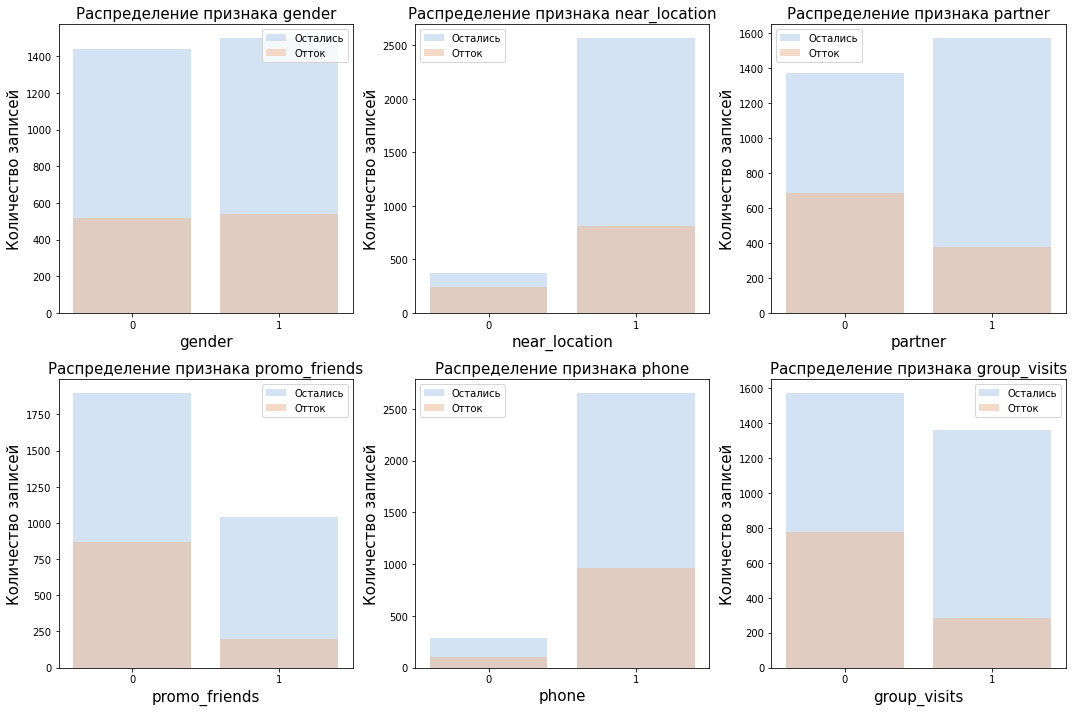

In [17]:
# задаем цикл для построения гистограмм по категориальным переменным

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.ravel()

for column, ax in zip(countplot_columns, axes): 
    sns.countplot(x=gum_data[column], ax=ax, data=gum_data, hue='churn', dodge=False, palette='pastel', alpha=.5)
    ax.set_title(f'Распределение признака {column}', fontsize = 15)
    ax.set_xlabel(column, fontsize = 15)
    ax.set_ylabel('Количество записей', fontsize = 15)
    ax.legend(['Остались', 'Отток'])

fig.tight_layout()
plt.show()

Данные графики показывают, что чаще остаются клиенты, которые живут или работают неподалеку, приходящие по акции "приведи друга" и посещающие групповые занятия. От пола клиента отток не зависит, доли мужчин и женщин практически равны.

В наши графики лишь наглядно подтверждают выводы сделанные в пп.3.2..

### Матрица корреляций

Построим матрицу корреляций и отобразим её.

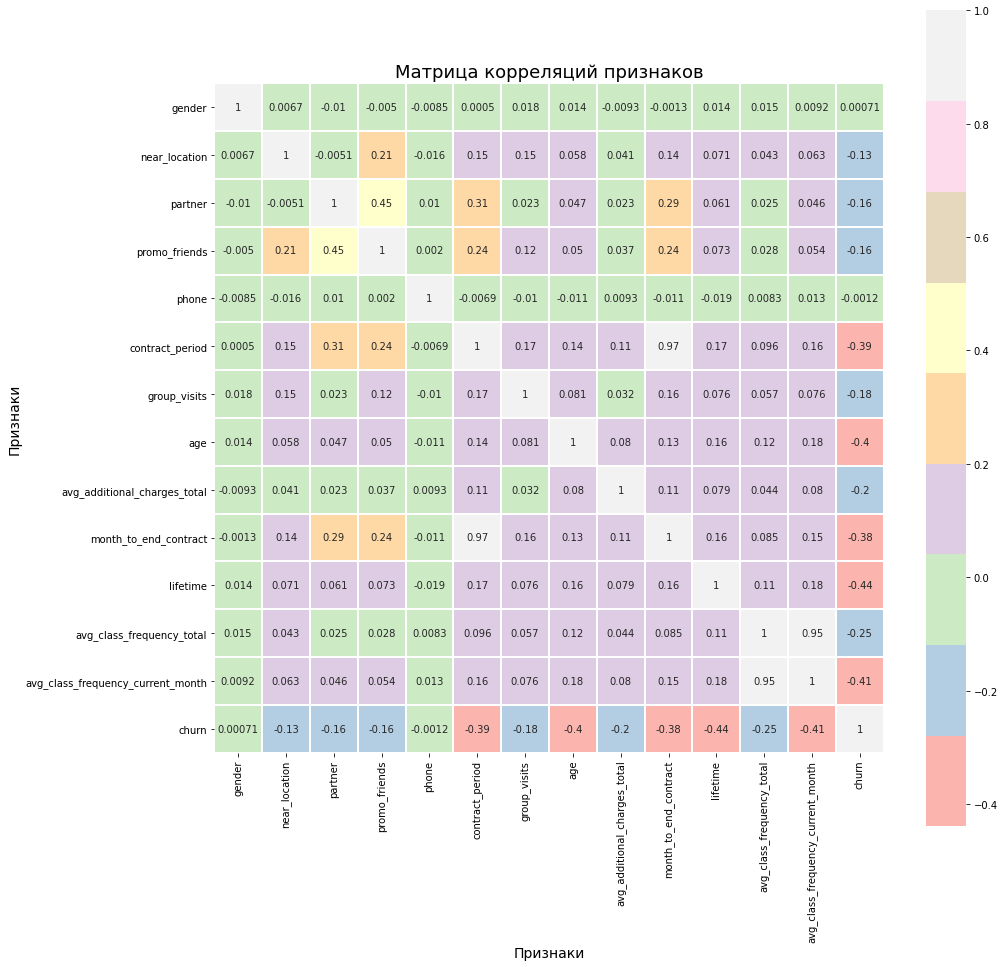

In [18]:
# строим матрицу корреляции

plt.figure(figsize=(15, 15))
sns.heatmap(gum_data.corr(), annot=True, square=True, linewidths=1, cmap='Pastel1')
plt.title('Матрица корреляций признаков', fontsize=18)
plt.xlabel('Признаки', fontsize = 14)
plt.ylabel('Признаки', fontsize = 14)
plt.show()

**Вывод**

* Видна сильная корреляция между `month_to_end_contract` и `contract_period` (0.97) и между `avg_class_frequency_total` и `avg_class_frequency_current_month` (0.95), что вполне логично, так как признаки связаны. Можно назвать эти признаки мультиколлинеарными (взаимозависимые или очень сильно скоррелированные признаки).
* Так же выделяется корреляция между `promo_friends` и `partner` (0.45). Скорее всего, сотрудники партнеров чаще приглашают своих друзей, чем остальные.
* Сильной корреляции целевой перменной churn с признаками не выявлено, но можно сделать след выводы:
1) отток совсем не зависит от пола и наличия контактного номера;
2) максимально влияющие признаки - время с первого обращения в фитнес (-0.44), среднее количество посещений в месяц, возраст и длительного текущего договора. Все они отрицательно коррелированы с оттоком - чем меньше отток, тем больше значения этих переменных.

## Модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак - факт оттока клиента в следующем месяце. Для начала разобьем данные на обучающую и валидационную выборку функцией `train_test_split()`.

In [19]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)

X = gum_data.drop(columns=['churn'], axis=1)
y = gum_data['churn']

# разделяем модель на обучающую и валидационную выборку

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# создадим объект класса StandardScaler и применим его к обучающей выборке

scaler = StandardScaler()

# обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

X_train_st = scaler.fit_transform(X_train)

# применяем стандартизацию к матрице признаков для тестовой выборки

X_test_st = scaler.transform(X_test)

Далее обучим модель на train-выборке двумя способами:
* Логистической регрессией (`LogisticRegression`)
* Случайным лесом (`RandomForestClassifier`).

In [20]:
# определим функцию, которая будет выводить наши метрики

def metrics(name, model):
    model.fit(X_train_st, y_train)
    y_pred = model.predict(X_test_st)
    print(f'Метрики для модели "{name}":')
    print('\tДоля правильных ответов: Accuracy = {:.3f}'.format(accuracy_score(y_test, y_pred)))
    print('\tТочность: Precision = {:.3f}'.format(precision_score(y_test, y_pred)))
    print('\tПолнота: Recall = {:.3f}'.format(recall_score(y_test, y_pred)), '\n')

In [21]:
# задаем алгоритм для наших моделей и выведем все метрики

lr_model = LogisticRegression(random_state=0)
metrics('Логистическая регрессия', lr_model)

rfc_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
metrics('Случайный лес', rfc_model)

Метрики для модели "Логистическая регрессия":
	Доля правильных ответов: Accuracy = 0.935
	Точность: Precision = 0.896
	Полнота: Recall = 0.854 

Метрики для модели "Случайный лес":
	Доля правильных ответов: Accuracy = 0.922
	Точность: Precision = 0.875
	Полнота: Recall = 0.825 



Попробуем перебор гиперпараметров через `GridSearchCV` и посмотрим на метрики моделей.

In [22]:
parametrs = { 'n_estimators': range (10, 100, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

clf = RandomForestClassifier()

In [23]:
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(X_train_st, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 100, 10)})

In [24]:
grid.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 30}

In [25]:
metrics('Логистическая регрессия', lr_model)
metrics('Случайный лес', rfc_model)

rfc_model_2 = RandomForestClassifier(n_estimators = 90, max_depth = 11, min_samples_leaf = 1,
                                     min_samples_split = 4, random_state = 0)

metrics('Случайный лес best', rfc_model_2)

Метрики для модели "Логистическая регрессия":
	Доля правильных ответов: Accuracy = 0.935
	Точность: Precision = 0.896
	Полнота: Recall = 0.854 

Метрики для модели "Случайный лес":
	Доля правильных ответов: Accuracy = 0.922
	Точность: Precision = 0.875
	Полнота: Recall = 0.825 

Метрики для модели "Случайный лес best":
	Доля правильных ответов: Accuracy = 0.924
	Точность: Precision = 0.883
	Полнота: Recall = 0.821 



**Вывод:**

* Обе модели показали себя достаточно хорошо (высокие показатели Accuracy, Precision, Recall).
* По всем трем параметрам модель Логистисеской регрессии `LogisticRegression` немного лучше модели Случайного леса `RandomForestClassifier`.

## Кластеризация клиентов

Прежде всего, для кластеризации пользователей нам необходимо стандартизировать данные.

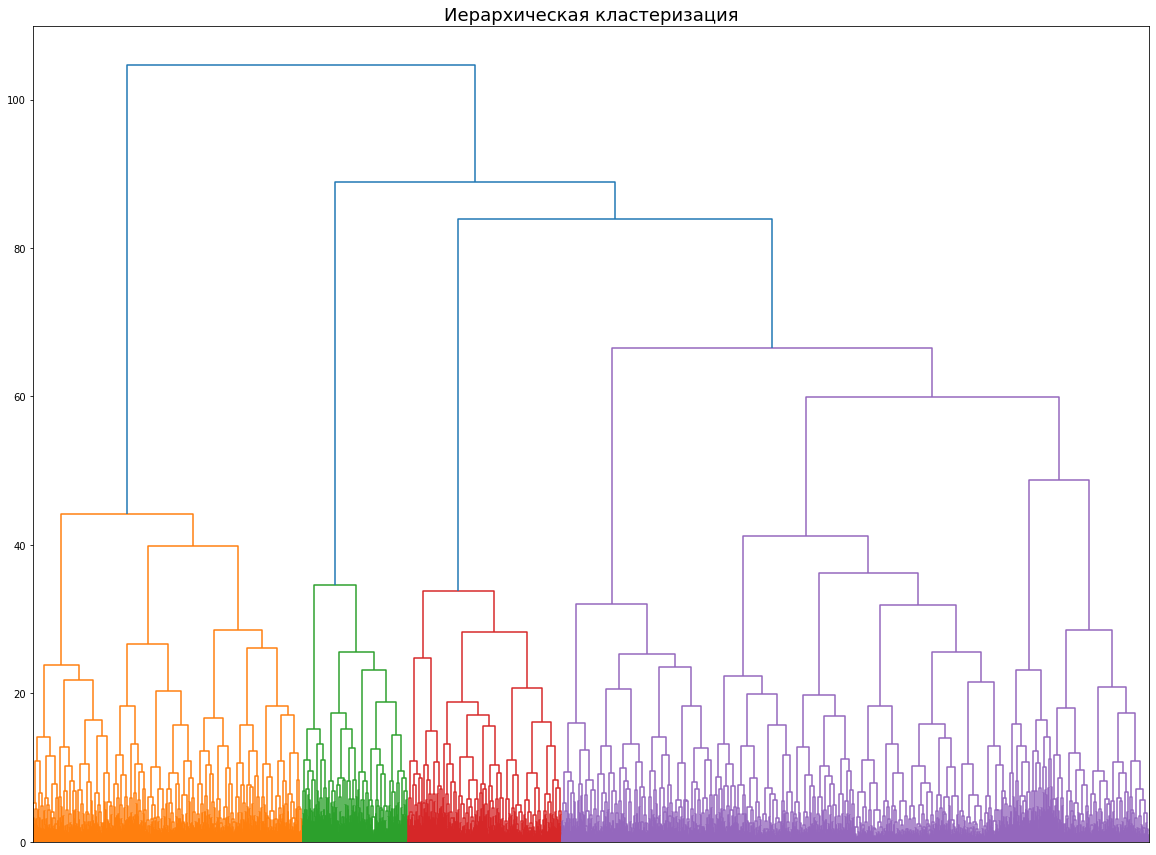

In [26]:
# стандартизируем данные

X_sc = scaler.fit_transform(X)
linked = linkage(X_sc, method = 'ward')

# визуализируем как дендрограмму

plt.figure(figsize=(20, 15))  
dendrogram(linked, orientation='top', no_labels = True)
plt.title('Иерархическая кластеризация', fontsize=18)
plt.show() 

Мы видим явно выделенных 4 кластера. По ТЗ возьмем число кластеров равное 5.

In [27]:
# задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата

km = KMeans(n_clusters=5, random_state=0)

# применяем алгоритм к данным и формируем вектор кластеров

labels = km.fit_predict(X_sc)
gum_data['cluster_km'] = labels

Рассчитаем метрику силуэта для нашей кластеризации.

In [28]:
print('Метрика силуэта: Silhouette_score = {:.2f}'.format(silhouette_score(X_sc, labels)))

Метрика силуэта: Silhouette_score = 0.14


Значение метрики силуэта принимает значения от -1 до 1. Чем ближе к 1, тем качественнее кластеризация. `Silhouette_score = 0.14` кластеризация прошла не очень хорошо.

In [29]:
# вывод статистики по средним значениям признаков по кластеру

gum_data.groupby('cluster_km').mean().T

cluster_km,0,1,2,3,4
gender,0.50,0.52,0.50,0.49,0.56
near_location,0.96,0.86,0.00,1.00,0.98
partner,0.78,0.47,0.46,0.35,0.36
promo_friends,0.57,0.31,0.08,0.24,0.23
phone,1.00,0.00,1.00,1.00,1.00
contract_period,10.89,4.79,2.35,1.95,2.67
group_visits,0.54,0.43,0.22,0.34,0.47
age,29.98,29.30,28.48,28.17,30.13
avg_additional_charges_total,160.76,143.96,135.46,131.62,161.66
month_to_end_contract,9.95,4.48,2.20,1.86,2.46


Уже по средним значениям мы видим, что у людей из кластера 2 и 3 наибольший отток. И в остальных показателях у них наименьшие средние.

Далее посмотрим на графическое распределение по кластерам.

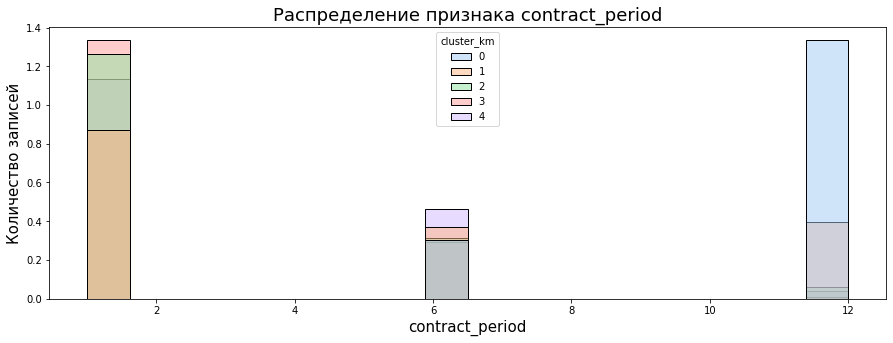

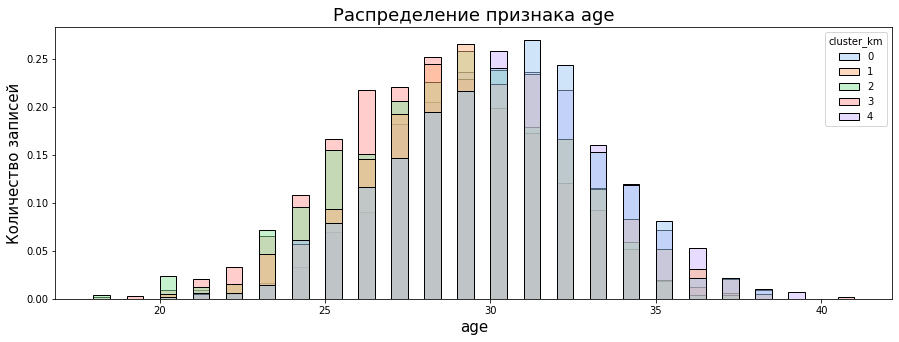

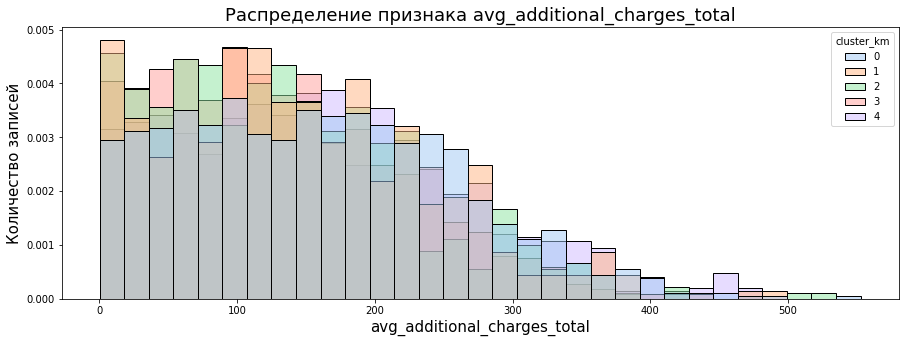

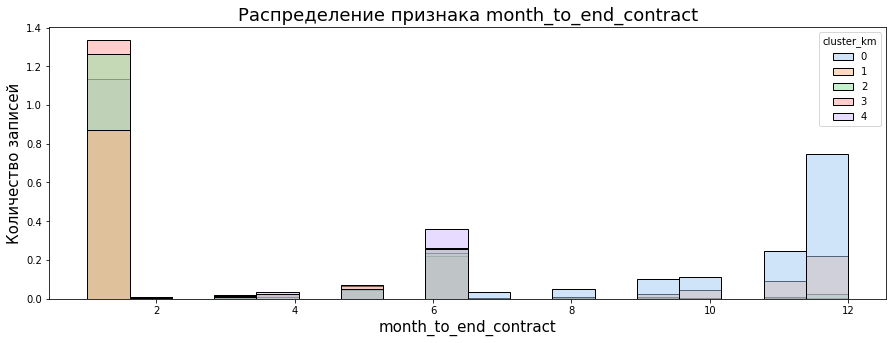

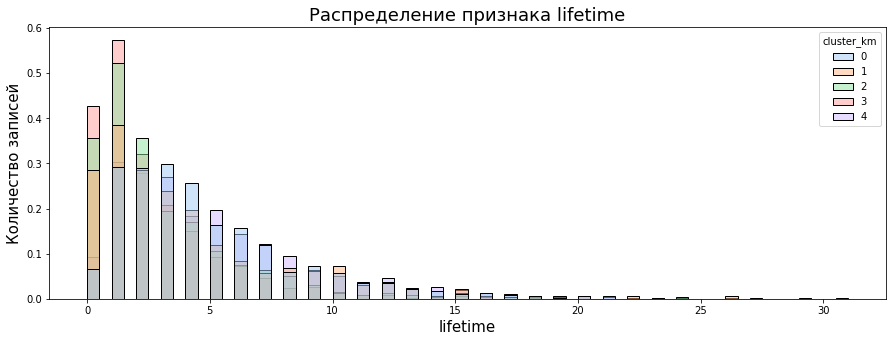

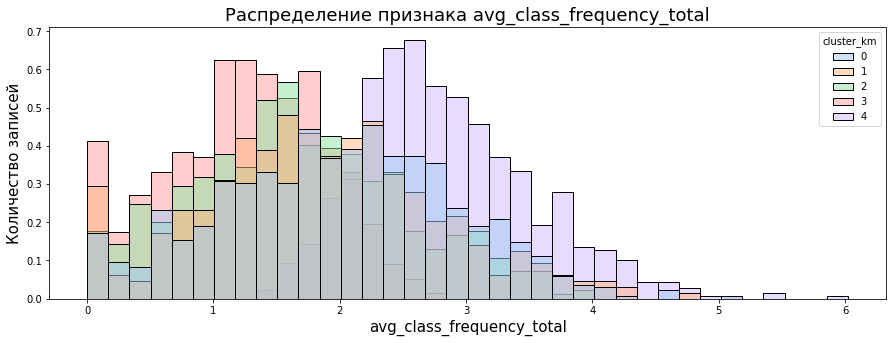

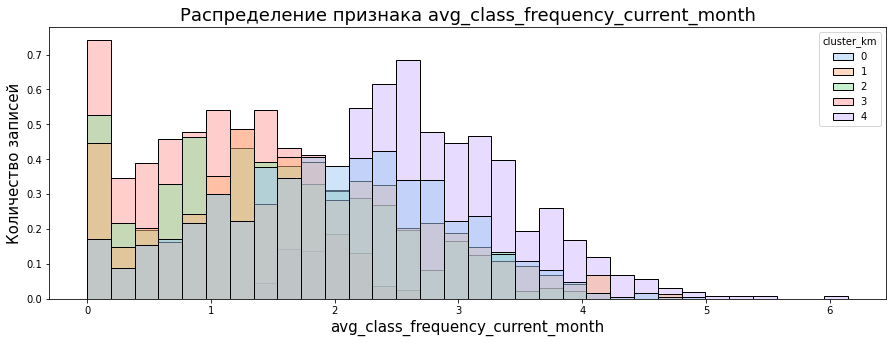

In [30]:
# задаем цикл для построения гистограмм по количественным переменным

for column in histplot_columns:
    plt.figure(figsize=(15, 5))
    ax = sns.histplot(x=gum_data[column], data=gum_data, hue='cluster_km', stat='density', common_norm=False, palette='pastel')
    ax.set_title(f'Распределение признака {column}', fontsize = 18)
    ax.set_xlabel(column, fontsize = 15)
    ax.set_ylabel('Количество записей', fontsize = 15)
    plt.show()

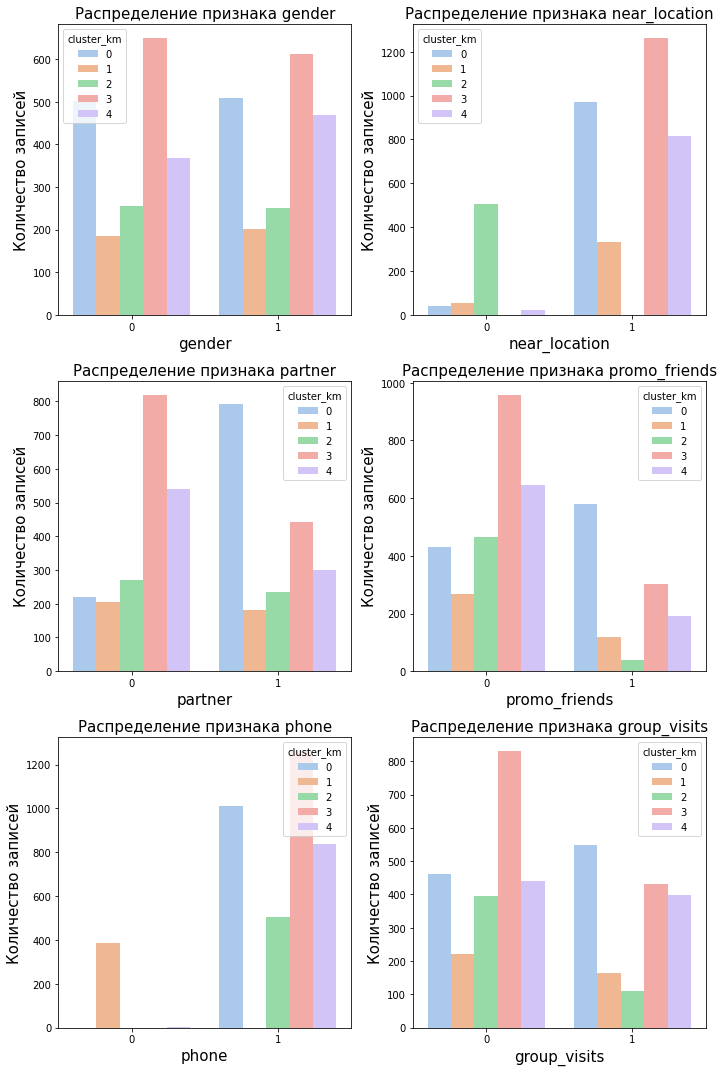

In [31]:
# задаем цикл для построения гистограмм по категориальным переменным

fig, axes = plt.subplots(3, 2, figsize=(10, 15))

axes = axes.ravel()

for column, ax in zip(countplot_columns, axes): 
    sns.countplot(x=gum_data[column], ax=ax, data=gum_data, hue='cluster_km', palette='pastel')
    ax.set_title(f'Распределение признака {column}', fontsize = 15)
    ax.set_xlabel(column, fontsize = 15)
    ax.set_ylabel('Количество записей', fontsize = 15)
    
fig.tight_layout()
plt.show()

**Кластер 0:**

* со значительным преобладанием абонентов на 12 месяцев;
* средним возрастом около 30 лет;
* высоким уровнем дополнительных оплат (около 166);
* большим сроком до окончания абонемента;
* большим сроком от начала пользования услугами;
* посещением около 2-х раз в неделю;
* приблизительно равным распределением между мужчинами и женщинами;
* большинство клиентов живут (работают) рядом с фитнес-центром;
* большинство клиентов пришли от компаний-партнёров;
* большая часть клиентов пришли по промо-акции от друзей;
* наличием контактных данных;
* посещают групповые занятия.

**Кластер 1:**

* со значительным преобладанием абонентов на 1 месяцев, но так же достаточное количество абонементов на 6 месяцев;
* средним возрастом около 30 лет;
* средним уровнем дополнительных оплат (около 144);
* небольшим сроком до окончания абонемента;
* средним сроком от начала пользования услугами;
* посещением около 2-х раз в неделю.
* приблизительно равным распределением между мужчинами и женщинами;
* большинство клиентов живут (работают) рядом с фитнес-центром;
* доля клиентов пришедших от компаний-партнёров практически равно доли стороних;
* большая часть клиентов пришли не по промо-акции от друзей;
* отсуствием контактных данных;
* приблизительно одинаково посещают/не посещают групповые занятия.

**Кластер 2:**

* со значительным преобладанием абонентов на 1 месяц, но встречаются так же абонементы на 6 месяцев;
* средним возрастом около 28 лет;
* низким уровнем дополнительных оплат (около 135);
* небольшим сроком до окончания абонемента;
* небольшим сроком от начала пользования услугами;
* посещением около 1,5 раз в неделю.
* приблизительно равным распределением между мужчинами и женщинами;
* большинство клиентов живут (работают) не рядом с фитнес-центром;
* доля клиентов пришедших от компаний-партнёров практически равно доли стороних;
* большая часть клиентов пришли не по промо-акции от друзей;
* наличием контактных данных;
* большая часть не посещают групповые занятия.

**Кластер 3:**

* со значительным преобладанием абонентов на 1 месяцев;
* средним возрастом около 28 лет;
* низким уровнем дополнительных оплат (около 132);
* небольшим сроком до окончания абонемента;
* небольшим сроком от начала пользования услугами;
* посещением около 1-го раза в неделю.
* приблизительно равным распределением между мужчинами и женщинами;
* большинство клиентов живут (работают) рядом с фитнес-центром;
* большинство клиентов пришли не от компаний-партнёров;
* большая часть клиентов пришли не по промо-акции от друзей;
* наличием контактных данных;
* не посещают групповые занятия.

**Кластер 4:**

* со значительным преобладанием абонентов на 1 месяц, но встречаются так же абонементы на 6 месяцев;
* средним возрастом чуть старше 30 лет;
* высоким уровнем дополнительных оплат (около 162);
* небольшим сроком до окончания абонемента;
* средним сроком от начала пользования услугами;
* посещением около 3-х раз в неделю.
* приблизительно равным распределением между мужчинами и женщинами;
* большинство клиентов живут (работают) рядом с фитнес-центром;
* большинство клиентов пришли не от компаний-партнёров;
* большая часть клиентов пришли не по промо-акции от друзей;
* наличием контактных данных;
* приблизительно одинаково посещают/не посещают групповые занятия.

Далее рассчитаем долю оотока для каждого полученного кластера.

In [32]:
# для каждого полученного кластера посчитаем долю оттока

display(gum_data.groupby('cluster_km').agg({'churn':'mean'}))

,churn
cluster_km,
0,0.03
1,0.27
2,0.44
3,0.51
4,0.07


Больше всего отток клиентов во 2 и 3 кластерах. Самый маленький отток из 0 и 4 кластера.

## Выводы и базовые рекомендации по работе с клиентами

Было проведено исследование данных о клиентах фитнес-центра «Культурист-датасаентист». Эти данные содержат в себе информацию о 4 000 клиентов и 14 показателях, один из которых (отток клиентов выбран в модели в качестве целевой переменной). Анализируемыми показателями, которые влияют на отток выбраны следующие характеристики клиентов: пол, близость к фитнес-центру, принадлежность к компании-партнёру фитнес-центра, факт первоначальной записи в рамках промо-акции «приведи друга», наличие контактного телефона, возраст, время с момента первого обращения в фитнес-центр, длительность текущего действующего абонемента, срок до окончания действующего абонемента, факт посещения групповых занятий, средняя частоа посещений в неделю за все время с начала действия абонемента и за предыдущий месяц, суммарная выручка от других услуг фитнес-центра.

**Анализ данных позволил сделать следующие выводы:**

* Распределение по по полу практическии равно.
* Большинство клиентов живет (работает) рядом с фитнес-клубом.
* Практически половина клиентов является сотрудниками партнерских организаций.
* Около 31% клиентов пришли по акции "Приведи друга"ю
* Известны мобильные номера 91% клиентов.
* Средняя длительность аббонементов клиентов - 4,7 месяца.
* 41% клиентов посещают групповые занятия.
* Средний возраст клиентов - 29 лет.
* Средние дополнительные расходы на клиента - 147.
* Средний срок до окончания договора - 4,3 месяца.
* Среднее время с момента первого обращения в фитнес-клуб - 3,7 месяца.
* Средняя частота посещений за все время - 1,88 раз в неделю.
* Средняя частота посещений за последний месяц - 1,77 раз в неделю.
* 27% клиентов ушли за текущий месяц.

*При анализе данных по оттоку клиентов показал:*

* Распределение по полу не отличается, это говорит о том, что этот признак не влияет на отток/приток клиентов.
* Ближе живущие клиенты чуть реже попадают в отток. Можно сказать, что этот признак оказывает слабое влияние.
* Среди партнеров компаний отток клиентов меньше.
* Клиенты пришедшие по акции "Приведи друга" почти в два раза реже уходят. Этот показатель так же оказывает положительное влияние на клиентов.
* Наличее мобильного номера клиента не оказывает никакого вляние на их отток. Показатель не оказывает никакого влияния.
* Средняя длительность абонемента больше у оставшихся клиентов, это вполне логично, если клиент купил обонемент на год, то он будет ходить, чтобы не потерять деньги потраченные на приобретение абонемента. У большей части клиентов которые ушли в отток средний срок абонемента около 2-х месяцев. Влияние признака на клиентов высокое.
* Оставшиеся пользователи чаще ходят на групповые занятия. Этот признак так же оказывает сильное влияение на клиентов. Вполне возможно, что на групповых занятиях многие клиенты заводят новые знакомства, а это способствует посещению фитнес-клуба в целом.
* Возраст не оказывает сильное влияние на отток клиентов. Разница в среднем возрасте незначительная.
* Различие в выручке незначительное. Но клиенты которые остались тратят немного больше на дополнительные услуги в фитнес-клубе.
* Оставшееся время до конца абонемента намного больше у оставшихся клиентов, что вполне логично.
* Среди клиентов которые ходят уже продолжительное время отток значительно меньше, возможно все дело в привычке.
* Клиенты которые остались чаще посещают фитнес-клуб в неделю. Посещение в предыдущем месяце распределено приблизительно так же. Возможно дело в привычке.

Метрики для модели "Логистическая регрессия":
	Доля правильных ответов: Accuracy = 0.935
	Точность: Precision = 0.896
	Полнота: Recall = 0.854 

Метрики для модели "Случайный лес":
	Доля правильных ответов: Accuracy = 0.922
	Точность: Precision = 0.875
	Полнота: Recall = 0.825
    
 Метрики для модели "Случайный лес best":
	Доля правильных ответов: Accuracy = 0.924
	Точность: Precision = 0.883
	Полнота: Recall = 0.821    

Обе модели показали себя достаточно хорошо (высокие показатели Accuracy, Precision, Recall).
По всем трем параметрам модель Логистисеской регрессии `LogisticRegression` немного лучше модели Случайного леса `RandomForestClassifier`.

По дендрограмме было высказано предположение о наличии четырёх кластеров в данных. Однако, было принято решение для прогноза кластеров клиентов использовать пять кластеров в модели K-Means.

Анализ средних значений и распределений признаков для кластеров показал, что выделенные кластеры имеют следующие отличительные характеристики:

**Кластер 0:**

* со значительным преобладанием абонентов на 12 месяцев;
* средним возрастом около 30 лет;
* высоким уровнем дополнительных оплат (около 166);
* большим сроком до окончания абонемента;
* большим сроком от начала пользования услугами;
* посещением около 2-х раз в неделю;
* приблизительно равным распределением между мужчинами и женщинами;
* большинство клиентов живут (работают) рядом с фитнес-центром;
* большинство клиентов пришли от компаний-партнёров;
* большая часть клиентов пришли по промо-акции от друзей;
* наличием контактных данных;
* посещают групповые занятия.

**Кластер 1:**

* со значительным преобладанием абонентов на 1 месяцев, но так же достаточное количество абонементов на 6 месяцев;
* средним возрастом около 30 лет;
* средним уровнем дополнительных оплат (около 144);
* небольшим сроком до окончания абонемента;
* средним сроком от начала пользования услугами;
* посещением около 2-х раз в неделю.
* приблизительно равным распределением между мужчинами и женщинами;
* большинство клиентов живут (работают) рядом с фитнес-центром;
* доля клиентов пришедших от компаний-партнёров практически равно доли стороних;
* большая часть клиентов пришли не по промо-акции от друзей;
* отсуствием контактных данных;
* приблизительно одинаково посещают/не посещают групповые занятия.

**Кластер 2:**

* со значительным преобладанием абонентов на 1 месяц, но встречаются так же абонементы на 6 месяцев;
* средним возрастом около 28 лет;
* низким уровнем дополнительных оплат (около 135);
* небольшим сроком до окончания абонемента;
* небольшим сроком от начала пользования услугами;
* посещением около 1,5 раз в неделю.
* приблизительно равным распределением между мужчинами и женщинами;
* большинство клиентов живут (работают) не рядом с фитнес-центром;
* доля клиентов пришедших от компаний-партнёров практически равно доли стороних;
* большая часть клиентов пришли не по промо-акции от друзей;
* наличием контактных данных;
* большая часть не посещают групповые занятия.

**Кластер 3:**

* со значительным преобладанием абонентов на 1 месяцев;
* средним возрастом около 28 лет;
* низким уровнем дополнительных оплат (около 132);
* небольшим сроком до окончания абонемента;
* небольшим сроком от начала пользования услугами;
* посещением около 1-го раза в неделю.
* приблизительно равным распределением между мужчинами и женщинами;
* большинство клиентов живут (работают) рядом с фитнес-центром;
* большинство клиентов пришли не от компаний-партнёров;
* большая часть клиентов пришли не по промо-акции от друзей;
* наличием контактных данных;
* не посещают групповые занятия.

**Кластер 4:**

* со значительным преобладанием абонентов на 1 месяц, но встречаются так же абонементы на 6 месяцев;
* средним возрастом чуть старше 30 лет;
* высоким уровнем дополнительных оплат (около 162);
* небольшим сроком до окончания абонемента;
* средним сроком от начала пользования услугами;
* посещением около 3-х раз в неделю.
* приблизительно равным распределением между мужчинами и женщинами;
* большинство клиентов живут (работают) рядом с фитнес-центром;
* большинство клиентов пришли не от компаний-партнёров;
* большая часть клиентов пришли не по промо-акции от друзей;
* наличием контактных данных;
* приблизительно одинаково посещают/не посещают групповые занятия.

**Рекомендации**

На основе представленных выводов, предложены следующие рекомендации для стратегии взаимодействия с пользователями сети фитнес-центров "Культурист-датасаентист" и их удержания.

*Целевая аудитория:*
* Те кто живет (работает) рядом с фитнес-центром;
* Уделить внимание поколению 30+.

1) Рекомендуется превлечение клиентов используя партнерские программы.

2) Ввести дополнительные скидки для клиентов с большим сроком абонемента на дополнительные услуги фитнес-центра, а так же предлагать участвовать в групповых занятиях (способствует заведению новых знакомств и более частому посещению фитнес-центра).

3) Завлекать клиентов скидками на более длительные абонементы.